루브릭
1. 이미지 분류기 모델이 성공적으로 만들어 졌는가? : 트레이닝 정상적 수행
2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가? : 데이터셋의 다양성, 정규화 등의 시도가 적절하였음.
3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?

# 목차
***
## 1. 데이터를 준비하자.
## 2. 딥러닝 네트워크 설계하기
## 3. 딥러닝 네트워크 학습하기
## 4. 테스트 데이터로 확인하기
## 5. 결과 분석하기
## 6. 다양한 방법을 시도해 보자
## 7. 회고
## 8. 참고자료

***

# 1. 데이터를 준비하자

In [43]:
# 필요한 라이브러리
import os
from PIL import Image
import glob
import matplotlib.pyplot as plt

In [55]:
# 이미지 크기 조절 함수, # 원본이미지와 구분하기 위해 저장경로를 달리합니다.
def resize_images(img_path, save_path):
    images = glob.glob(img_path + "/*.jpg")
    index_save_path = len(img_path)
    print(index_save_path)
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_path = save_path+img[index_save_path:]
        new_img.save(new_path, "JPEG")
    
    print(img)
    print(new_path)

In [56]:
# 가위 바위 보에 대하여 
image_dir_path = "./data/scissor"
image_save_path = "./resizedData/scissor"
os.makedirs(image_save_path,exist_ok=True)
resize_images(image_dir_path, image_save_path )
#
image_dir_path = "./data/rock"
image_save_path = "./resizedData/rock"
os.makedirs(image_save_path,exist_ok=True)
resize_images(image_dir_path, image_save_path )
#
image_dir_path = "./data/paper"
image_save_path = "./resizedData/paper"
os.makedirs(image_save_path,exist_ok=True)
resize_images(image_dir_path, image_save_path )

14
./data/scissor\99.jpg
./resizedData/scissor\99.jpg


In [46]:
import numpy as np

def load_data(img_path, number_of_data=300):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "./resizedData"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


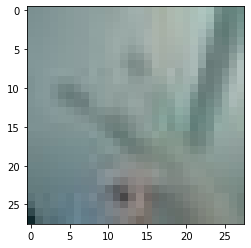

In [47]:
# 데이터 확인
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 2. 딥러닝 네트워크 설계하기

In [48]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

# 3. 딥러닝 네트워크 학습하기

In [49]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 4ms/step - loss: 1.1088 - accuracy: 0.2895
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0967 - accuracy: 0.3248
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0979 - accuracy: 0.3965
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0931 - accuracy: 0.3723
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0949 - accuracy: 0.4129
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0858 - accuracy: 0.6549
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0789 - accuracy: 0.5167
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0760 - accuracy: 0.4391
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0644 - accuracy: 0.6059
Epoch 10/10
10/10 [==============================] - 0s 5ms/step - loss: 1.0551 - accuracy: 0.6631


# 4. 데스트 데이터로 확인하기

In [50]:
# 테스트 데이터 준비
# 가위 바위 보에 대하여 
image_dir_path = "./data/test/scissor"
image_save_path = "./resizedData/test/scissor"
os.makedirs(image_save_path,exist_ok=True)
resize_images(image_dir_path, image_save_path )
#
image_dir_path = "./data/test/rock"
image_save_path = "./resizedData/test/rock"
os.makedirs(image_save_path,exist_ok=True)
resize_images(image_dir_path, image_save_path )
#
image_dir_path = "./data/test/paper"
image_save_path = "./resizedData/test/paper"
os.makedirs(image_save_path,exist_ok=True)
resize_images(image_dir_path, image_save_path )

19
16
17


In [51]:
# test 셋 확인
image_dir_path = "./resizedData/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [52]:
# test accracy 확인
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.1097 - accuracy: 0.4067
test_loss: 1.1096978187561035 
test_accuracy: 0.40666666626930237


# 5. 결과 분석하기

### 결과
- 에폭을 10으로 하였을 때 정확도가 0.2895로 시작해서 0.6631 까지 증가했다.
- 이때, test 셋에 대한 정확도는 0.4066으로 train셋의 정확도에 한참 미치지 못하며, 임의로 찍었을때 나올 정확도인 0.333보다 조금 높은 수준이다.

### 분석
- 우선, 학습데이터의 수가 각 클래스 100개, 전체 300개로 적다.
- 학습데이터와 테스트데이터가 각각 한사람에 의해 비슷한 각도로 촬영되어 수집된 데이터로 다양하지 못하고, 모든 이미지의 배경이 동일하다. 때문에 비슷한 학습데이터에 치우쳐져 학습하고, 배경과 촬영각도, 손크기, 손방향 등이 크게 상이한 테스트 데이터를 판단할 때 성능이 좋지 못했을 가능성이 있다.
- 학습에서 에폭이 10회로 매우 적다.

### 아이디어
- 하이퍼 파라메터 조절 : 에폭 증가를 시켜 학습이 진행됨에 따라 acc와 loss 를 확인하고 적절한 모델을 선택하자. 그리고 test 셋의 acc 를 확인했을때 과적합(train_acc 는 높고, test_acc는 낮음)이 보인다면 dropout 층을 추가하여 과적합을 막아보자.
- 전처리 단계 : 배경지우기, 회전, 손위치 센터에 옮기기, 이미지 값 조절. 등의 방법으로 이미지 데이터셋의 크기를 증가하고, 배경, 손크기, 손방향 등 다양한 데이터를 학습할수 있게 하자.
***


# 6. 다양한 방법을 시도해보자.
## 6.1 하이퍼 파라메터를 조절해보자
- 에폭을 증가(학습을 더많이 한다면?)
- 과적합을 막을 방법 dropout
***

### 6.1.1 에폭을 10회에서 100회로 증가하자.
- 에폭 증가에 따른 훈련 셋, 테스트 셋의 acc 와 loss 를 확인하자. 

In [103]:
# 모델생성 편의를 위해 함수화.
def create_model():
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))


    #model.summary()
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [104]:
# 모델 생성 및 요약 확인
model = create_model()
model.summary()


# 학습
hist = model.fit(x_train_norm, y_train, 
          epochs=100,
          callbacks=[cp_callback],
            validation_data=(x_test_norm,y_test))


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_33 (Dense)             (None, 3)               

10/10 [==============================] - 0s 10ms/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 5.3548 - val_accuracy: 0.3833
Epoch 47/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0431 - accuracy: 0.9956 - val_loss: 5.5501 - val_accuracy: 0.3600
Epoch 48/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 5.4936 - val_accuracy: 0.3667
Epoch 49/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 6.0276 - val_accuracy: 0.3633
Epoch 50/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0307 - accuracy: 1.0000 - val_loss: 5.6477 - val_accuracy: 0.3600

Epoch 00050: saving model to training_2\cp-0050.ckpt
Epoch 51/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 6.1932 - val_accuracy: 0.3500
Epoch 52/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0256 - accuracy: 1.0000 -

Epoch 100/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 9.0073 - val_accuracy: 0.3567

Epoch 00100: saving model to training_2\cp-0100.ckpt


In [105]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

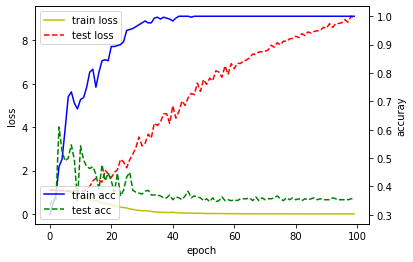

In [108]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss',linestyle='--')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc', linestyle='--')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [110]:
hist.history['val_accuracy'][7]

0.54666668176651

### 기존 모델에서 에폭을 증가한 결과
- train_acc 와 train_loss 는 에폭이 증가함에 따라 각각 1과 0에 수렴한다.
- test_acc 는 8번째 에폭에서 최대 0.5466 까지 증가했다가 값이 일정하지 않게 증감하면서, 0.3566에 수렵하고있다.

### 해석 
- 에폭을 증가하여도 얻을 수 있는 최대 정확도는 0.5466 정도 이고, 이는 학습마다 다른 결과일 것이다.
- 약 30 에폭 이후부터 훈련데이터에만 적합하게 학습이되고 있다.
- 과적합, Overfitting이 발생하였다.

***

### 6.1.2 과적합을 막을 방법 dropout
- 드롭아웃을 0.2, 0.4, 0.6, 0.8 로 설정하여 확이해보자

In [138]:
# dropout 층을 추가한 모델생성 함수.
def create_model_2(drop_out = 0.2): # 드롭아웃 초깃값 0.2
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dropout(rate= drop_out)) # 추가된 드롭아웃 층
    model.add(keras.layers.Dense(3, activation='softmax'))


    #model.summary()
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [141]:
# 드롭아웃 0.2
model = create_model_2()
#model.summary()


# 학습
hist = model.fit(x_train_norm, y_train, 
          epochs=100,
          callbacks=[cp_callback],
            validation_data=(x_test_norm,y_test))



Epoch 1/100
10/10 [==============================] - 1s 23ms/step - loss: 1.1159 - accuracy: 0.2858 - val_loss: 1.1035 - val_accuracy: 0.3333
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 1.1034 - accuracy: 0.3458 - val_loss: 1.0976 - val_accuracy: 0.3700
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 1.0959 - accuracy: 0.3886 - val_loss: 1.0975 - val_accuracy: 0.3033
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 1.0974 - accuracy: 0.3628 - val_loss: 1.0953 - val_accuracy: 0.3667
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 1.0873 - accuracy: 0.4261 - val_loss: 1.0981 - val_accuracy: 0.3333

Epoch 00005: saving model to training_2\cp-0005.ckpt
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 1.0908 - accuracy: 0.3557 - val_loss: 1.0971 - val_accuracy: 0.3267
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 1.0841 - accuracy: 0.415

Epoch 55/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0690 - accuracy: 0.9842 - val_loss: 6.9966 - val_accuracy: 0.3667

Epoch 00055: saving model to training_2\cp-0055.ckpt
Epoch 56/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0717 - accuracy: 0.9864 - val_loss: 7.0022 - val_accuracy: 0.3267
Epoch 57/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0702 - accuracy: 0.9875 - val_loss: 6.9066 - val_accuracy: 0.3233
Epoch 58/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0765 - accuracy: 0.9747 - val_loss: 6.9542 - val_accuracy: 0.3367
Epoch 59/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0621 - accuracy: 0.9866 - val_loss: 7.3427 - val_accuracy: 0.3300
Epoch 60/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0586 - accuracy: 0.9867 - val_loss: 6.9626 - val_accuracy: 0.3133

Epoch 00060: saving model to training_2\cp-0060.ckpt
Epoch 61/100
10/10 [==================

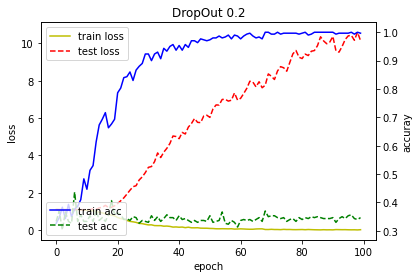

In [142]:
fig, loss_ax = plt.subplots()
plt.title('DropOut 0.2')
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss',linestyle='--')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc', linestyle='--')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [143]:
# 드롭 아웃 0.4
model = create_model_2(0.4)
model.summary()


# 학습
hist = model.fit(x_train_norm, y_train, 
          epochs=100,
          callbacks=[cp_callback],
            validation_data=(x_test_norm,y_test))

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 32)                25632     
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)              


Epoch 00045: saving model to training_2\cp-0045.ckpt
Epoch 46/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2453 - accuracy: 0.9199 - val_loss: 3.7542 - val_accuracy: 0.3600
Epoch 47/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2199 - accuracy: 0.9338 - val_loss: 3.7841 - val_accuracy: 0.3700
Epoch 48/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2243 - accuracy: 0.9457 - val_loss: 4.4823 - val_accuracy: 0.3633
Epoch 49/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1768 - accuracy: 0.9447 - val_loss: 4.4893 - val_accuracy: 0.3500
Epoch 50/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1632 - accuracy: 0.9609 - val_loss: 4.6398 - val_accuracy: 0.3733

Epoch 00050: saving model to training_2\cp-0050.ckpt
Epoch 51/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1971 - accuracy: 0.9489 - val_loss: 4.7358 - val_accuracy: 0.3633
Epoch 52/100
10/10 [================

10/10 [==============================] - 0s 9ms/step - loss: 0.0480 - accuracy: 0.9892 - val_loss: 10.8954 - val_accuracy: 0.3467
Epoch 100/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0507 - accuracy: 0.9878 - val_loss: 10.6843 - val_accuracy: 0.3467

Epoch 00100: saving model to training_2\cp-0100.ckpt


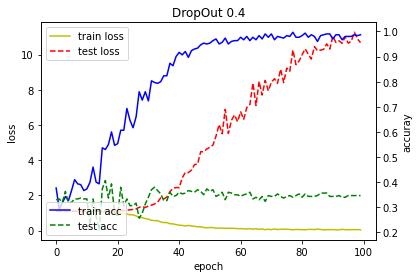

In [144]:
fig, loss_ax = plt.subplots()
plt.title('DropOut 0.4')
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss',linestyle='--')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc', linestyle='--')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [145]:
# 드롭 아웃 0.6
model = create_model_2(0.6)
model.summary()


# 학습
hist = model.fit(x_train_norm, y_train, 
          epochs=100,
          callbacks=[cp_callback],
            validation_data=(x_test_norm,y_test))

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 32)                25632     
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)              


Epoch 00045: saving model to training_2\cp-0045.ckpt
Epoch 46/100
10/10 [==============================] - 0s 9ms/step - loss: 0.8328 - accuracy: 0.5571 - val_loss: 1.4344 - val_accuracy: 0.3100
Epoch 47/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7749 - accuracy: 0.5510 - val_loss: 1.4323 - val_accuracy: 0.3167
Epoch 48/100
10/10 [==============================] - 0s 9ms/step - loss: 0.8467 - accuracy: 0.5311 - val_loss: 1.4106 - val_accuracy: 0.3067
Epoch 49/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7625 - accuracy: 0.5954 - val_loss: 1.4374 - val_accuracy: 0.2967
Epoch 50/100
10/10 [==============================] - 0s 10ms/step - loss: 0.7019 - accuracy: 0.6400 - val_loss: 1.4746 - val_accuracy: 0.3100

Epoch 00050: saving model to training_2\cp-0050.ckpt
Epoch 51/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7506 - accuracy: 0.5967 - val_loss: 1.4357 - val_accuracy: 0.3133
Epoch 52/100
10/10 [===================

10/10 [==============================] - 0s 9ms/step - loss: 0.5167 - accuracy: 0.7101 - val_loss: 3.1808 - val_accuracy: 0.3400
Epoch 100/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5380 - accuracy: 0.7177 - val_loss: 3.1666 - val_accuracy: 0.3500

Epoch 00100: saving model to training_2\cp-0100.ckpt


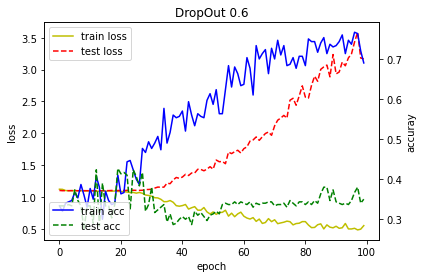

In [146]:
fig, loss_ax = plt.subplots()
plt.title('DropOut 0.6')
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss',linestyle='--')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc', linestyle='--')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [147]:
# 드롭 아웃 0.8
model = create_model_2(0.8)
model.summary()


# 학습
hist = model.fit(x_train_norm, y_train, 
          epochs=100,
          callbacks=[cp_callback],
            validation_data=(x_test_norm,y_test))

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 32)                25632     
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)              


Epoch 00045: saving model to training_2\cp-0045.ckpt
Epoch 46/100
10/10 [==============================] - 0s 10ms/step - loss: 0.7805 - accuracy: 0.6466 - val_loss: 1.5073 - val_accuracy: 0.3333
Epoch 47/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7702 - accuracy: 0.6334 - val_loss: 1.7018 - val_accuracy: 0.3400
Epoch 48/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7954 - accuracy: 0.5583 - val_loss: 1.5853 - val_accuracy: 0.3300
Epoch 49/100
10/10 [==============================] - 0s 11ms/step - loss: 0.7738 - accuracy: 0.6099 - val_loss: 1.7280 - val_accuracy: 0.3267
Epoch 50/100
10/10 [==============================] - 0s 10ms/step - loss: 0.8226 - accuracy: 0.5359 - val_loss: 1.6610 - val_accuracy: 0.3500

Epoch 00050: saving model to training_2\cp-0050.ckpt
Epoch 51/100
10/10 [==============================] - 0s 10ms/step - loss: 0.7567 - accuracy: 0.6352 - val_loss: 1.9310 - val_accuracy: 0.3267
Epoch 52/100
10/10 [================

10/10 [==============================] - 0s 9ms/step - loss: 0.5223 - accuracy: 0.7428 - val_loss: 3.6019 - val_accuracy: 0.3600
Epoch 100/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5422 - accuracy: 0.7068 - val_loss: 4.1740 - val_accuracy: 0.3433

Epoch 00100: saving model to training_2\cp-0100.ckpt


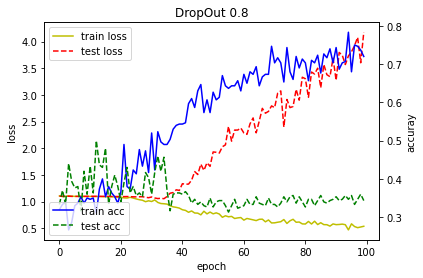

In [148]:
fig, loss_ax = plt.subplots()
plt.title('DropOut 0.8')
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss',linestyle='--')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc', linestyle='--')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#### 드롭아웃의 효과는 미비했다.
- test acc 의 뚜렷한 증가나, 변화과 관찰되지 않는다.
- 드롭아웃으로 인해, 훈련셋 정확도가 수렴하는 에폭지점이 늦춰지고 있다.
- 여전히 과적합이 있다.

***

## 6.2 데이터를 추가하자
- 앞에서 기존 데이터 셋으로 학습한 모델의 에폭 증가에 따른 과적합을 막는 방법으로 드롭아웃이 충분하지 않았다. 이는 여전히 데이터가 편향적(1명의 손, 같은 배경, 비슷한 이미지)이고, 그 수가 적어서(클래스별 100장 총 300장) 나타는 결과로 예상된다.
- 데이터셋의 다양성을 얻기 위해 다른 사람의 손사진 데이터를 추가고 이러한 문제점을 해결해 보고자 한다.

In [209]:
# 데이터를 추가하자 
# 파일명이 중복되어 크기조절 함수 수정.
def resize_images_2(img_path, save_path):
    images = glob.glob(img_path + "/*.jpg")
    index_save_path = len(img_path)
    print(index_save_path)
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_path = save_path+img[index_save_path:]
        new_path = new_path[:index_save_path+2]+img_path[-1]+img[index_save_path+1:]
        new_img.save(new_path, "JPEG")
    print(new_path)

In [210]:
# 데이터 추가 :다른 사람 4명의 데이터를 디렉토리 추가하였다.
image_dir_path = "./add_data/scissor_a"
image_save_path = "./resizedData/scissor"
os.makedirs(image_save_path,exist_ok=True)
resize_images_2(image_dir_path, image_save_path )
#
image_dir_path = "./add_data/rock_a"
image_save_path = "./resizedData/rock"
os.makedirs(image_save_path,exist_ok=True)
resize_images_2(image_dir_path, image_save_path )
#
image_dir_path = "./add_data/paper_a"
image_save_path = "./resizedData/paper"
os.makedirs(image_save_path,exist_ok=True)
resize_images_2(image_dir_path, image_save_path )

# 데이터 추가
image_dir_path = "./add_data/scissor_b"
image_save_path = "./resizedData/scissor"
os.makedirs(image_save_path,exist_ok=True)
resize_images_2(image_dir_path, image_save_path )
#
image_dir_path = "./add_data/rock_b"
image_save_path = "./resizedData/rock"
os.makedirs(image_save_path,exist_ok=True)
resize_images_2(image_dir_path, image_save_path )
#
image_dir_path = "./add_data/paper_b"
image_save_path = "./resizedData/paper"
os.makedirs(image_save_path,exist_ok=True)
resize_images_2(image_dir_path, image_save_path )

# 데이터 추가
image_dir_path = "./add_data/scissor_c"
image_save_path = "./resizedData/scissor"
os.makedirs(image_save_path,exist_ok=True)
resize_images_2(image_dir_path, image_save_path )
#
image_dir_path = "./add_data/rock_c"
image_save_path = "./resizedData/rock"
os.makedirs(image_save_path,exist_ok=True)
resize_images_2(image_dir_path, image_save_path )
#
image_dir_path = "./add_data/paper_c"
image_save_path = "./resizedData/paper"
os.makedirs(image_save_path,exist_ok=True)
resize_images_2(image_dir_path, image_save_path )

# 데이터 추가
image_dir_path = "./add_data/scissor_d"
image_save_path = "./resizedData/scissor"
os.makedirs(image_save_path,exist_ok=True)
resize_images_2(image_dir_path, image_save_path )
#
image_dir_path = "./add_data/rock_d"
image_save_path = "./resizedData/rock"
os.makedirs(image_save_path,exist_ok=True)
resize_images_2(image_dir_path, image_save_path )
#
image_dir_path = "./add_data/paper_d"
image_save_path = "./resizedData/paper"
os.makedirs(image_save_path,exist_ok=True)
resize_images_2(image_dir_path, image_save_path )

20
./resizedData/scissor\a99.jpg
17
./resizedData/rock\a99.jpg
18
./resizedData/paper\a99.jpg
20
./resizedData/scissor\b99.jpg
17
./resizedData/rock\b99.jpg
18
./resizedData/paper\b99.jpg
20
./resizedData/scissor\c99.jpg
17
./resizedData/rock\c99.jpg
18
./resizedData/paper\c99.jpg
20
./resizedData/scissor\d99.jpg
17
./resizedData/rock\d99.jpg
18
./resizedData/paper\d99.jpg


In [213]:
# 데이터 수 확인.
path = "./resizedData/scissor"
file_list_s = os.listdir(path)
print('scissor :',len(file_list_s))

path = "./resizedData/rock"
file_list_r = os.listdir(path)
print('rock :',len(file_list_r))

path = "./resizedData/paper"
file_list_p = os.listdir(path)
print('paper :',len(file_list_p))
print('total :',len(file_list_s)+len(file_list_r)+len(file_list_p))

scissor : 797
rock : 840
paper : 832
total : 2469


In [215]:
# 데이터 불러오기
image_dir_path = "./resizedData"
(x_train, y_train)=load_data(image_dir_path, number_of_data=2469)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2469 입니다.
x_train shape: (2469, 28, 28, 3)
y_train shape: (2469,)


In [216]:
# 모델 생성 및 요약 확인
model = create_model()
#model.summary()


#추가된 데이터로 학습
hist = model.fit(x_train_norm, y_train, 
          epochs=100,
          callbacks=[cp_callback],
            validation_data=(x_test_norm,y_test))

Epoch 1/100
78/78 [==============================] - 1s 7ms/step - loss: 1.0944 - accuracy: 0.3663 - val_loss: 1.1322 - val_accuracy: 0.2767
Epoch 2/100
78/78 [==============================] - 0s 5ms/step - loss: 0.9080 - accuracy: 0.6403 - val_loss: 1.9676 - val_accuracy: 0.2567
Epoch 3/100
78/78 [==============================] - 0s 5ms/step - loss: 0.6193 - accuracy: 0.7625 - val_loss: 2.0920 - val_accuracy: 0.3200
Epoch 4/100
78/78 [==============================] - 0s 5ms/step - loss: 0.5116 - accuracy: 0.7916 - val_loss: 2.6985 - val_accuracy: 0.2867
Epoch 5/100
78/78 [==============================] - 0s 5ms/step - loss: 0.3901 - accuracy: 0.8522 - val_loss: 3.4791 - val_accuracy: 0.2733

Epoch 00005: saving model to training_2\cp-0005.ckpt
Epoch 6/100
78/78 [==============================] - 0s 5ms/step - loss: 0.2578 - accuracy: 0.9161 - val_loss: 3.6731 - val_accuracy: 0.2633
Epoch 7/100
78/78 [==============================] - 0s 5ms/step - loss: 0.2001 - accuracy: 0.9399 -

78/78 [==============================] - 0s 5ms/step - loss: 3.4028e-04 - accuracy: 1.0000 - val_loss: 13.6372 - val_accuracy: 0.2500
Epoch 55/100
78/78 [==============================] - 0s 5ms/step - loss: 2.5726e-04 - accuracy: 1.0000 - val_loss: 13.6142 - val_accuracy: 0.2500

Epoch 00055: saving model to training_2\cp-0055.ckpt
Epoch 56/100
78/78 [==============================] - 0s 5ms/step - loss: 2.7364e-04 - accuracy: 1.0000 - val_loss: 13.9940 - val_accuracy: 0.2567
Epoch 57/100
78/78 [==============================] - 0s 6ms/step - loss: 2.8514e-04 - accuracy: 1.0000 - val_loss: 13.9024 - val_accuracy: 0.2500
Epoch 58/100
78/78 [==============================] - 0s 6ms/step - loss: 2.4058e-04 - accuracy: 1.0000 - val_loss: 14.0928 - val_accuracy: 0.2500
Epoch 59/100
78/78 [==============================] - 0s 5ms/step - loss: 1.9563e-04 - accuracy: 1.0000 - val_loss: 14.1727 - val_accuracy: 0.2500
Epoch 60/100
78/78 [==============================] - 0s 5ms/step - loss: 2.1

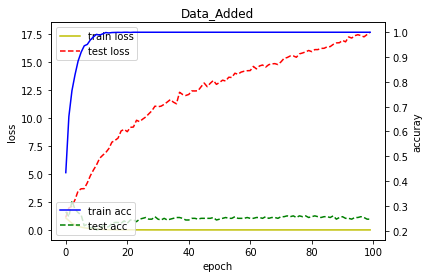

In [217]:
fig, loss_ax = plt.subplots()
plt.title('Data_Added')
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss',linestyle='--')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc', linestyle='--')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [218]:
# 드롭아웃도 추가해보자.
# 드롭 아웃 0.2
model = create_model_2(0.2)
model.summary()


# 학습
hist = model.fit(x_train_norm, y_train, 
          epochs=100,
          callbacks=[cp_callback],
            validation_data=(x_test_norm,y_test))

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_40 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 32)                25632     
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)              


Epoch 00045: saving model to training_2\cp-0045.ckpt
Epoch 46/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0104 - accuracy: 0.9971 - val_loss: 11.0977 - val_accuracy: 0.2933
Epoch 47/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9975 - val_loss: 11.4991 - val_accuracy: 0.3033
Epoch 48/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0141 - accuracy: 0.9966 - val_loss: 10.7448 - val_accuracy: 0.2933
Epoch 49/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0137 - accuracy: 0.9969 - val_loss: 12.3774 - val_accuracy: 0.2900
Epoch 50/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9940 - val_loss: 11.5743 - val_accuracy: 0.3167

Epoch 00050: saving model to training_2\cp-0050.ckpt
Epoch 51/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0311 - accuracy: 0.9886 - val_loss: 12.2522 - val_accuracy: 0.3033
Epoch 52/100
78/78 [==============

78/78 [==============================] - 0s 5ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 16.1591 - val_accuracy: 0.3200
Epoch 100/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 17.5880 - val_accuracy: 0.3033

Epoch 00100: saving model to training_2\cp-0100.ckpt


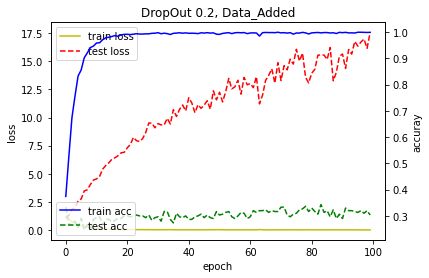

In [219]:
fig, loss_ax = plt.subplots()
plt.title('DropOut 0.2, Data_Added')
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss',linestyle='--')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc', linestyle='--')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [220]:
# 드롭아웃도 추가해보자.
# 드롭 아웃 0.4
model = create_model_2(0.4)
model.summary()


# 학습
hist = model.fit(x_train_norm, y_train, 
          epochs=100,
          callbacks=[cp_callback],
            validation_data=(x_test_norm,y_test))

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_41 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 32)                25632     
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)              


Epoch 00045: saving model to training_2\cp-0045.ckpt
Epoch 46/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 11.2756 - val_accuracy: 0.4100
Epoch 47/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 13.0032 - val_accuracy: 0.4167
Epoch 48/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 13.7298 - val_accuracy: 0.4167
Epoch 49/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.9958 - val_loss: 13.0177 - val_accuracy: 0.3800
Epoch 50/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 13.1404 - val_accuracy: 0.4167

Epoch 00050: saving model to training_2\cp-0050.ckpt
Epoch 51/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0093 - accuracy: 0.9951 - val_loss: 12.5615 - val_accuracy: 0.3933
Epoch 52/100
78/78 [==============

78/78 [==============================] - 0s 5ms/step - loss: 0.0079 - accuracy: 0.9966 - val_loss: 17.5499 - val_accuracy: 0.4367
Epoch 100/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 0.9976 - val_loss: 17.4255 - val_accuracy: 0.4233

Epoch 00100: saving model to training_2\cp-0100.ckpt


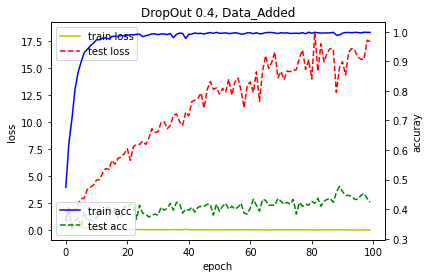

In [221]:
fig, loss_ax = plt.subplots()
plt.title('DropOut 0.4, Data_Added')
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss',linestyle='--')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc', linestyle='--')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [222]:
# 드롭 아웃 0.6
model = create_model_2(0.4)
model.summary()


# 학습
hist = model.fit(x_train_norm, y_train, 
          epochs=100,
          callbacks=[cp_callback],
            validation_data=(x_test_norm,y_test))

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_42 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 32)                25632     
_________________________________________________________________
dropout_24 (Dropout)         (None, 32)              


Epoch 00045: saving model to training_2\cp-0045.ckpt
Epoch 46/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.9954 - val_loss: 10.0409 - val_accuracy: 0.2833
Epoch 47/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 9.4453 - val_accuracy: 0.2900
Epoch 48/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.9960 - val_loss: 11.2337 - val_accuracy: 0.2833
Epoch 49/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 8.9209 - val_accuracy: 0.3000
Epoch 50/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 0.9992 - val_loss: 10.3460 - val_accuracy: 0.3033

Epoch 00050: saving model to training_2\cp-0050.ckpt
Epoch 51/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 9.9617 - val_accuracy: 0.2867
Epoch 52/100
78/78 [=================

78/78 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 0.9978 - val_loss: 13.4775 - val_accuracy: 0.3233
Epoch 100/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 14.9876 - val_accuracy: 0.3067

Epoch 00100: saving model to training_2\cp-0100.ckpt


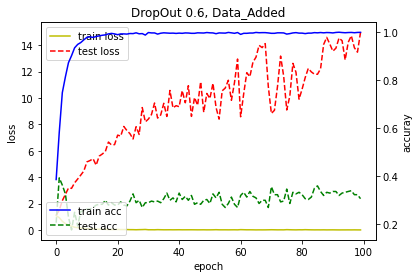

In [223]:
fig, loss_ax = plt.subplots()
plt.title('DropOut 0.6, Data_Added')
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss',linestyle='--')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc', linestyle='--')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [224]:
# 드롭 아웃 0.8
model = create_model_2(0.4)
model.summary()


# 학습
hist = model.fit(x_train_norm, y_train, 
          epochs=100,
          callbacks=[cp_callback],
            validation_data=(x_test_norm,y_test))

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_43 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 32)                25632     
_________________________________________________________________
dropout_25 (Dropout)         (None, 32)              


Epoch 00045: saving model to training_2\cp-0045.ckpt
Epoch 46/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 11.0206 - val_accuracy: 0.3533
Epoch 47/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0171 - accuracy: 0.9940 - val_loss: 10.7449 - val_accuracy: 0.3467
Epoch 48/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 10.6260 - val_accuracy: 0.3433
Epoch 49/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0206 - accuracy: 0.9929 - val_loss: 10.6290 - val_accuracy: 0.3433
Epoch 50/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0128 - accuracy: 0.9967 - val_loss: 11.5538 - val_accuracy: 0.3500

Epoch 00050: saving model to training_2\cp-0050.ckpt
Epoch 51/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0124 - accuracy: 0.9950 - val_loss: 11.7405 - val_accuracy: 0.3467
Epoch 52/100
78/78 [==============

78/78 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 16.1769 - val_accuracy: 0.3433
Epoch 100/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 16.9162 - val_accuracy: 0.3467

Epoch 00100: saving model to training_2\cp-0100.ckpt


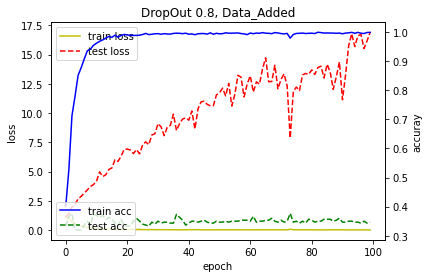

In [226]:
fig, loss_ax = plt.subplots()
plt.title('DropOut 0.8, Data_Added')
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss',linestyle='--')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc', linestyle='--')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#### 데이터 추가의 효과 또한 미비했다.
- 추가된 데이터셋으로 모델과, 드롭아웃이 추가된 모델 모두 눈에 띌만한 결과를 보여주지 못했다.
- 데부분 test_acc가 0.3 근처에 수렴한다. 1/3으로 찍는 정확도이다.
- 한편 dropout = 0.4 일때, test_acc는 0.4이상, 최대 0.45까지 성능을 보여주었다.

#### 분석 : 왜 데이터를 추가하였음에도 성능이 향상되지 않았을까?
- 1. 4명의 추가 데이터로 훈련데이터셋의 다양성을 얻기에 부족한 듯하다.
- 2. 각 사람의 데이터셋의 이미지들이 서로 비슷하여 실질적으로 학습에 도움을 주는 데이터 수는 적었을 것이다.(실제로 데이터셋을 살펴보면, 수십장의 비슷한 사진들이 있다. 이것은 이 사진들이 데이터셋의 다양성을 저해하고, 과적합으로 쉽게 빠지는 결과를 가져왔을  가능성이 있다.
- 3. test셋 데이터가 다른 한명의 가위 바위 보 사진이므로, test셋으로서 일반화 성능을 판단하는 데이터로 무리가 있다. 

# 7. 회고
- 한줄 평 : "Garbage in, garbage out"
- 어려웠던 점 : mnist 데이터와 달리, 직접 수집한 데이터로 간단한 분류기 성능을 구현하는 것이 이렇게 힘들일 일줄 몰랐다. 특히나 적고, 편향된 데이터셋으로 일반화된 성능을 실현하는 것은 정말 어렵다.
- 알아낸 점 : 프로젝트를 진행하면서 학습진행에 따른 정확도를 plot 하는 방법을 학습하여 큰도움이 되었다.
- 시도한 것들 : 가장 먼저 하이퍼파라미터 중 에폭증가를 통해 반복학습을 시도하였다. 결과 과접합을 만났다. 이를 해결하기 위해 드롭아웃층 추가 및 다양한 비율로 모델학습하고 에폭에 따른 테스트 데이터 정확도를 관찰하였다. 여전히 과적합 문제가 해결되지 않아, 데이터 추가방법을 시도 하였다.
- 정확도 부족에 원인대한 추정(루브릭기준 미충족)
> 1. 가장 큰 원인은 단순한 데이터의 추가는 데이터의 다양성 증가로 연결되지 않기 때문이다. 300장에서 2400여장으로 훈련 데이터셋을 증가 하였지만, 소수의 인원이 촬영한 가위바위보 이미지는 비슷한 환경과 촬영각도, 비슷한 손 모양등의 데이터가 수십장씩 구성되어있었다. 이는 데이터셋의 다양성을 증가하기보다. 에폭증가에 따른 과적합 시점을 앞당기는 결과를 보여주었다.
> 2. 이미지 데이터의 정보를 충분히 활용하지 않았다. 실제 원본 이미지를 224x224 크기에서 28x28 크기로 조정하는 과정에서 많은 데이터의 손실이 있었다. 배경색과 손색이 비슷하게 묻히는 경우, 손가락(가위)이 적은 픽셀로인해 경계가 뭉게져 구분하기 어려운 경우 등이 발견되었다.(아래 예)

- 아쉬운 점 : cv를 활용해 데이터 데이터의 다양성을 확보하지 못한것이 아쉽다. 전처리 과정에 대해 다음과 같은  구체적인 구상은 하였으나 아직 학습이 부족해 하지못했다.
> 1. 이미지의 배경을 삭제(배경을 0으로 채운다)
> 2. 이미지의 중심에 배경을 삭제한 손부분의 중심을 일치시킨다. 
> 3. 이미지 회전, 뒤집기 등으로 추가 데이터를 생성한다.

- 다짐 및 소감 : 다양한 cv 활용과, 과적합을 해결하기 위한 다른 추가적인 시도들을 하지 못한것이 아쉬움으로 남는다. 여러 시도를 하여도 과접합이 해결되지 않을때 마다 한줄 평에 남긴 것과 같이 "Garbage in, garbage out" 의 말이 여러번 속을 답답하게 했다. 한편, Garbage도 재활용, 업사이클 하여 좋은 성능의 모델을 구현하는 전문가가 되고싶다. 아직 배워야 할 내용이 태산같지만, 차근차근 해보려 한다.


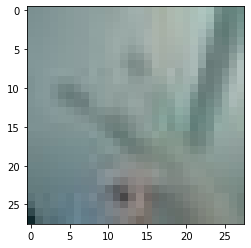

In [227]:
plt.imshow(x_train[0])

# 8. 참고자료
- 모델 저장과 복원 : https://www.tensorflow.org/tutorials/keras/save_and_load?hl=ko
- 학습과정 표시하기 : https://tykimos.github.io/2017/07/09/Training_Monitoring/